In [1]:
import torch
from d2l import torch as d2l
from torch import nn
import math

In [5]:
values = torch.arange(40, dtype=torch.float32).reshape(1,10,4).repeat(2,1,1)
valid_lens = torch.tensor([2,6])

In [13]:
help(d2l.plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add an Axes to the current figure or retrieve an existing Axes.
    
    This is a wrapper of `.Figure.add_subplot` which provides additional
    behavior when working with the implicit API (see the notes section).
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(**kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
        The position of the subplot described by one of
    
        - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
          *index* position on a grid with *nrows* rows and *ncols* columns.
          *index* starts at 1 in the upper left corner and increases to the
          right. *index* can also be a two-tuple specifying the (*first*,
          *last*) indices (1-based, and including *last*) of the subplo

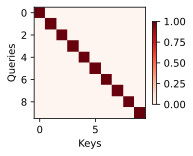

In [15]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles = None, figsize=(2.5, 2.5), cmap = 'Reds'):
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize = figsize, 
                                sharex = True, sharey = True, squeeze = False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap = cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_titles(titles)
    fig.colorbar(pcm, ax =axes, shrink = 0.6)
attention_weights = torch.eye(10).reshape(1,1,10,10)
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

In [7]:
#@save
def masked_softmax(X, valid_lens):
    if valid_lens is None:
        return nn.functional.softmax(X, dim = -1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        X = d2l.sequence_mask(X.reshape(-1, shape[-1]), valid_lens, value=-1e6)
        return nn.functional.softmax(X.reshape(shape), dim = -1)

In [8]:
masked_softmax(values, valid_lens)

tensor([[[0.2689, 0.7311, 0.0000, 0.0000],
         [0.2689, 0.7311, 0.0000, 0.0000],
         [0.2689, 0.7311, 0.0000, 0.0000],
         [0.2689, 0.7311, 0.0000, 0.0000],
         [0.2689, 0.7311, 0.0000, 0.0000],
         [0.2689, 0.7311, 0.0000, 0.0000],
         [0.2689, 0.7311, 0.0000, 0.0000],
         [0.2689, 0.7311, 0.0000, 0.0000],
         [0.2689, 0.7311, 0.0000, 0.0000],
         [0.2689, 0.7311, 0.0000, 0.0000]],

        [[0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439]]])